In [48]:
# Write your code here
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns
import scipy.stats
from scipy.stats import norm
import scipy.stats as stats
import math
from matplotlib.pyplot import figure
from sklearn.preprocessing import MinMaxScaler


In [49]:
#Load the csv files
garment=pd.read_csv("garments_worker_productivity.csv")
garment

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [50]:
garment.isnull().values.any()

True

In [51]:
garment=garment.fillna(method="ffill")
garment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [52]:
# Converting Team number from a numerical variable to a categorical variable
garment['team'] = garment['team'].apply(lambda x:str(x)) 
garment.info()

#Separating the dataframe to categorical and numerical dataframe for easy data handling :
garment_category=garment.select_dtypes(include='object')
garment_numerical=garment.select_dtypes(exclude='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   object 
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [53]:
garment_num_min_max_scale=  pd.DataFrame((MinMaxScaler().fit_transform(garment_numerical)), columns=['targeted_productivity','smv','wip','over_time','incentive','idle_time','idle_men','no_of_style_change','no_of_workers','actual_productivity'])
garment_num_min_max_scale

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1.000000,0.450252,0.047631,0.273148,0.027222,0.0,0.0,0.0,0.655172,0.797332
1,0.931507,0.020132,0.047631,0.037037,0.000000,0.0,0.0,0.0,0.068966,0.736180
2,1.000000,0.164731,0.041575,0.141204,0.013889,0.0,0.0,0.0,0.327586,0.639274
3,1.000000,0.164731,0.041575,0.141204,0.013889,0.0,0.0,0.0,0.327586,0.639274
4,1.000000,0.445219,0.050314,0.074074,0.013889,0.0,0.0,0.0,0.620690,0.639062
...,...,...,...,...,...,...,...,...,...,...
1192,0.931507,0.000000,0.040147,0.037037,0.000000,0.0,0.0,0.0,0.068966,0.445036
1193,0.863014,0.019357,0.040147,0.037037,0.000000,0.0,0.0,0.0,0.068966,0.441982
1194,0.794521,0.019357,0.040147,0.037037,0.000000,0.0,0.0,0.0,0.068966,0.441982
1195,0.931507,0.000000,0.040147,0.069444,0.000000,0.0,0.0,0.0,0.149425,0.306951


In [54]:
for col in garment_category.columns:
    print(garment_category[col].unique())
    print()

['1/1/2015' '1/3/2015' '1/4/2015' '1/5/2015' '1/6/2015' '1/7/2015'
 '1/8/2015' '1/10/2015' '1/11/2015' '1/12/2015' '1/13/2015' '1/14/2015'
 '1/15/2015' '1/17/2015' '1/18/2015' '1/19/2015' '1/20/2015' '1/21/2015'
 '1/22/2015' '1/24/2015' '1/25/2015' '1/26/2015' '1/27/2015' '1/28/2015'
 '1/29/2015' '1/31/2015' '2/1/2015' '2/2/2015' '2/3/2015' '2/4/2015'
 '2/5/2015' '2/7/2015' '2/8/2015' '2/9/2015' '2/10/2015' '2/11/2015'
 '2/12/2015' '2/14/2015' '2/15/2015' '2/16/2015' '2/17/2015' '2/18/2015'
 '2/19/2015' '2/22/2015' '2/23/2015' '2/24/2015' '2/25/2015' '2/26/2015'
 '2/28/2015' '3/1/2015' '3/2/2015' '3/3/2015' '3/4/2015' '3/5/2015'
 '3/7/2015' '3/8/2015' '3/9/2015' '3/10/2015' '3/11/2015']

['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']

['sweing' 'finishing ' 'finishing']

['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']

['8' '1' '11' '12' '6' '7' '2' '3' '9' '10' '5' '4']



In [55]:
# Removing white spaces in one of the 'finishing' 
garment_category.loc[:,'department'] = garment_category.loc[:,'department'].str.strip() 

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


In [56]:
#Correcting the error in sewing 
garment_category.loc[:,"department"]=garment_category.loc[:,"department"].replace(to_replace='sweing', value='sewing') 

In [57]:
for col in garment_category.columns:
    print(garment_category[col].unique())
    print()

['1/1/2015' '1/3/2015' '1/4/2015' '1/5/2015' '1/6/2015' '1/7/2015'
 '1/8/2015' '1/10/2015' '1/11/2015' '1/12/2015' '1/13/2015' '1/14/2015'
 '1/15/2015' '1/17/2015' '1/18/2015' '1/19/2015' '1/20/2015' '1/21/2015'
 '1/22/2015' '1/24/2015' '1/25/2015' '1/26/2015' '1/27/2015' '1/28/2015'
 '1/29/2015' '1/31/2015' '2/1/2015' '2/2/2015' '2/3/2015' '2/4/2015'
 '2/5/2015' '2/7/2015' '2/8/2015' '2/9/2015' '2/10/2015' '2/11/2015'
 '2/12/2015' '2/14/2015' '2/15/2015' '2/16/2015' '2/17/2015' '2/18/2015'
 '2/19/2015' '2/22/2015' '2/23/2015' '2/24/2015' '2/25/2015' '2/26/2015'
 '2/28/2015' '3/1/2015' '3/2/2015' '3/3/2015' '3/4/2015' '3/5/2015'
 '3/7/2015' '3/8/2015' '3/9/2015' '3/10/2015' '3/11/2015']

['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']

['sewing' 'finishing']

['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']

['8' '1' '11' '12' '6' '7' '2' '3' '9' '10' '5' '4']



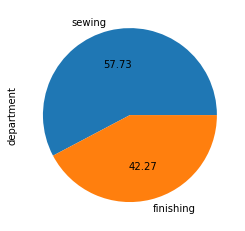

In [58]:
#Visualising the department categories
garment_category['department'].value_counts().plot(kind='pie', autopct="%.2f")
plt.show()

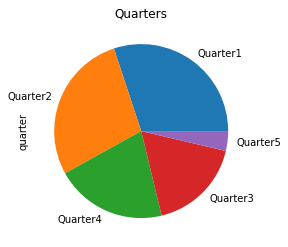

In [59]:
#Visualising the Quarter counts
plt.title("Quarters")
garment_category['quarter'].value_counts().plot(kind='pie')
plt.show()

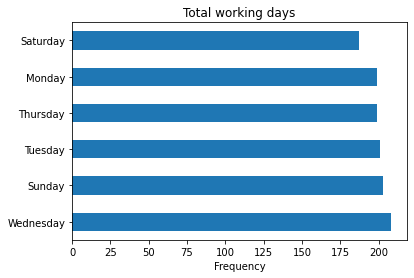

In [60]:
#Visualising the day counts
garment_category['day'].value_counts().plot(kind='barh')
plt.title("Total working days")
plt.xlabel('Frequency')
plt.show()

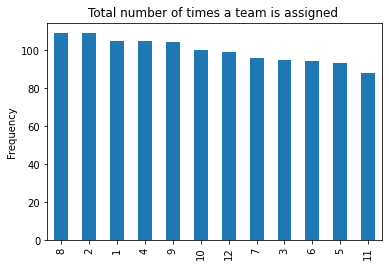

In [75]:
#Visualising the team counts
garment_category['team'].value_counts().plot(kind='bar')
plt.title("Total number of times a team is assigned ")
plt.ylabel('Frequency')
plt.show()

In [62]:
garment = pd.concat([garment_category, garment_num_min_max_scale], axis=1)
garment

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,8,1.000000,0.450252,0.047631,0.273148,0.027222,0.0,0.0,0.0,0.655172,0.797332
1,1/1/2015,Quarter1,finishing,Thursday,1,0.931507,0.020132,0.047631,0.037037,0.000000,0.0,0.0,0.0,0.068966,0.736180
2,1/1/2015,Quarter1,sewing,Thursday,11,1.000000,0.164731,0.041575,0.141204,0.013889,0.0,0.0,0.0,0.327586,0.639274
3,1/1/2015,Quarter1,sewing,Thursday,12,1.000000,0.164731,0.041575,0.141204,0.013889,0.0,0.0,0.0,0.327586,0.639274
4,1/1/2015,Quarter1,sewing,Thursday,6,1.000000,0.445219,0.050314,0.074074,0.013889,0.0,0.0,0.0,0.620690,0.639062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.931507,0.000000,0.040147,0.037037,0.000000,0.0,0.0,0.0,0.068966,0.445036
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.863014,0.019357,0.040147,0.037037,0.000000,0.0,0.0,0.0,0.068966,0.441982
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.794521,0.019357,0.040147,0.037037,0.000000,0.0,0.0,0.0,0.068966,0.441982
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.931507,0.000000,0.040147,0.069444,0.000000,0.0,0.0,0.0,0.149425,0.306951


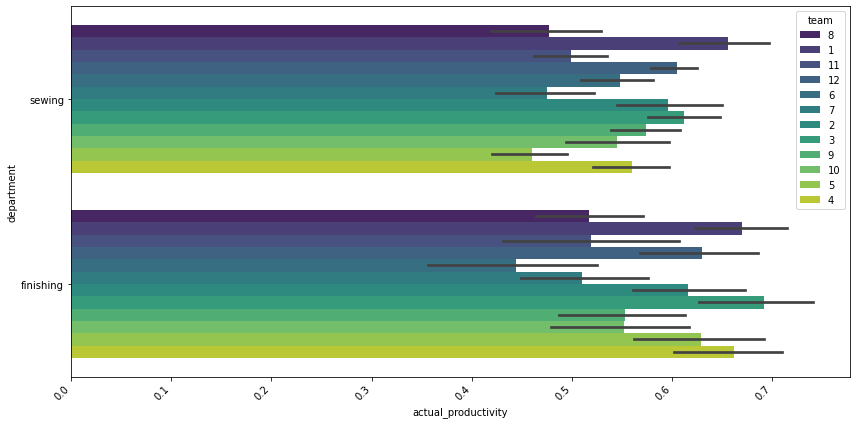

In [63]:
plt.figure(figsize=(12,6))
sns.barplot(x='actual_productivity',y='department',hue='team',data=garment,palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

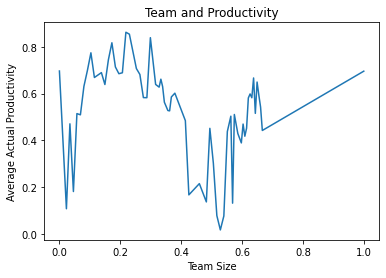

In [64]:
x_axis = garment['no_of_workers'].unique()
y_axis=[]
for values in x_axis:
    y_axis.append(garment['actual_productivity'][garment['no_of_workers'] == values].mean())

sns.lineplot(x=x_axis, y=y_axis)
plt.title("Team and Productivity")
plt.xlabel('Team Size')
plt.ylabel('Average Actual Productivity')
plt.show()

In [65]:
garment.to_csv('garmentproductivityfinal.csv',index=False)

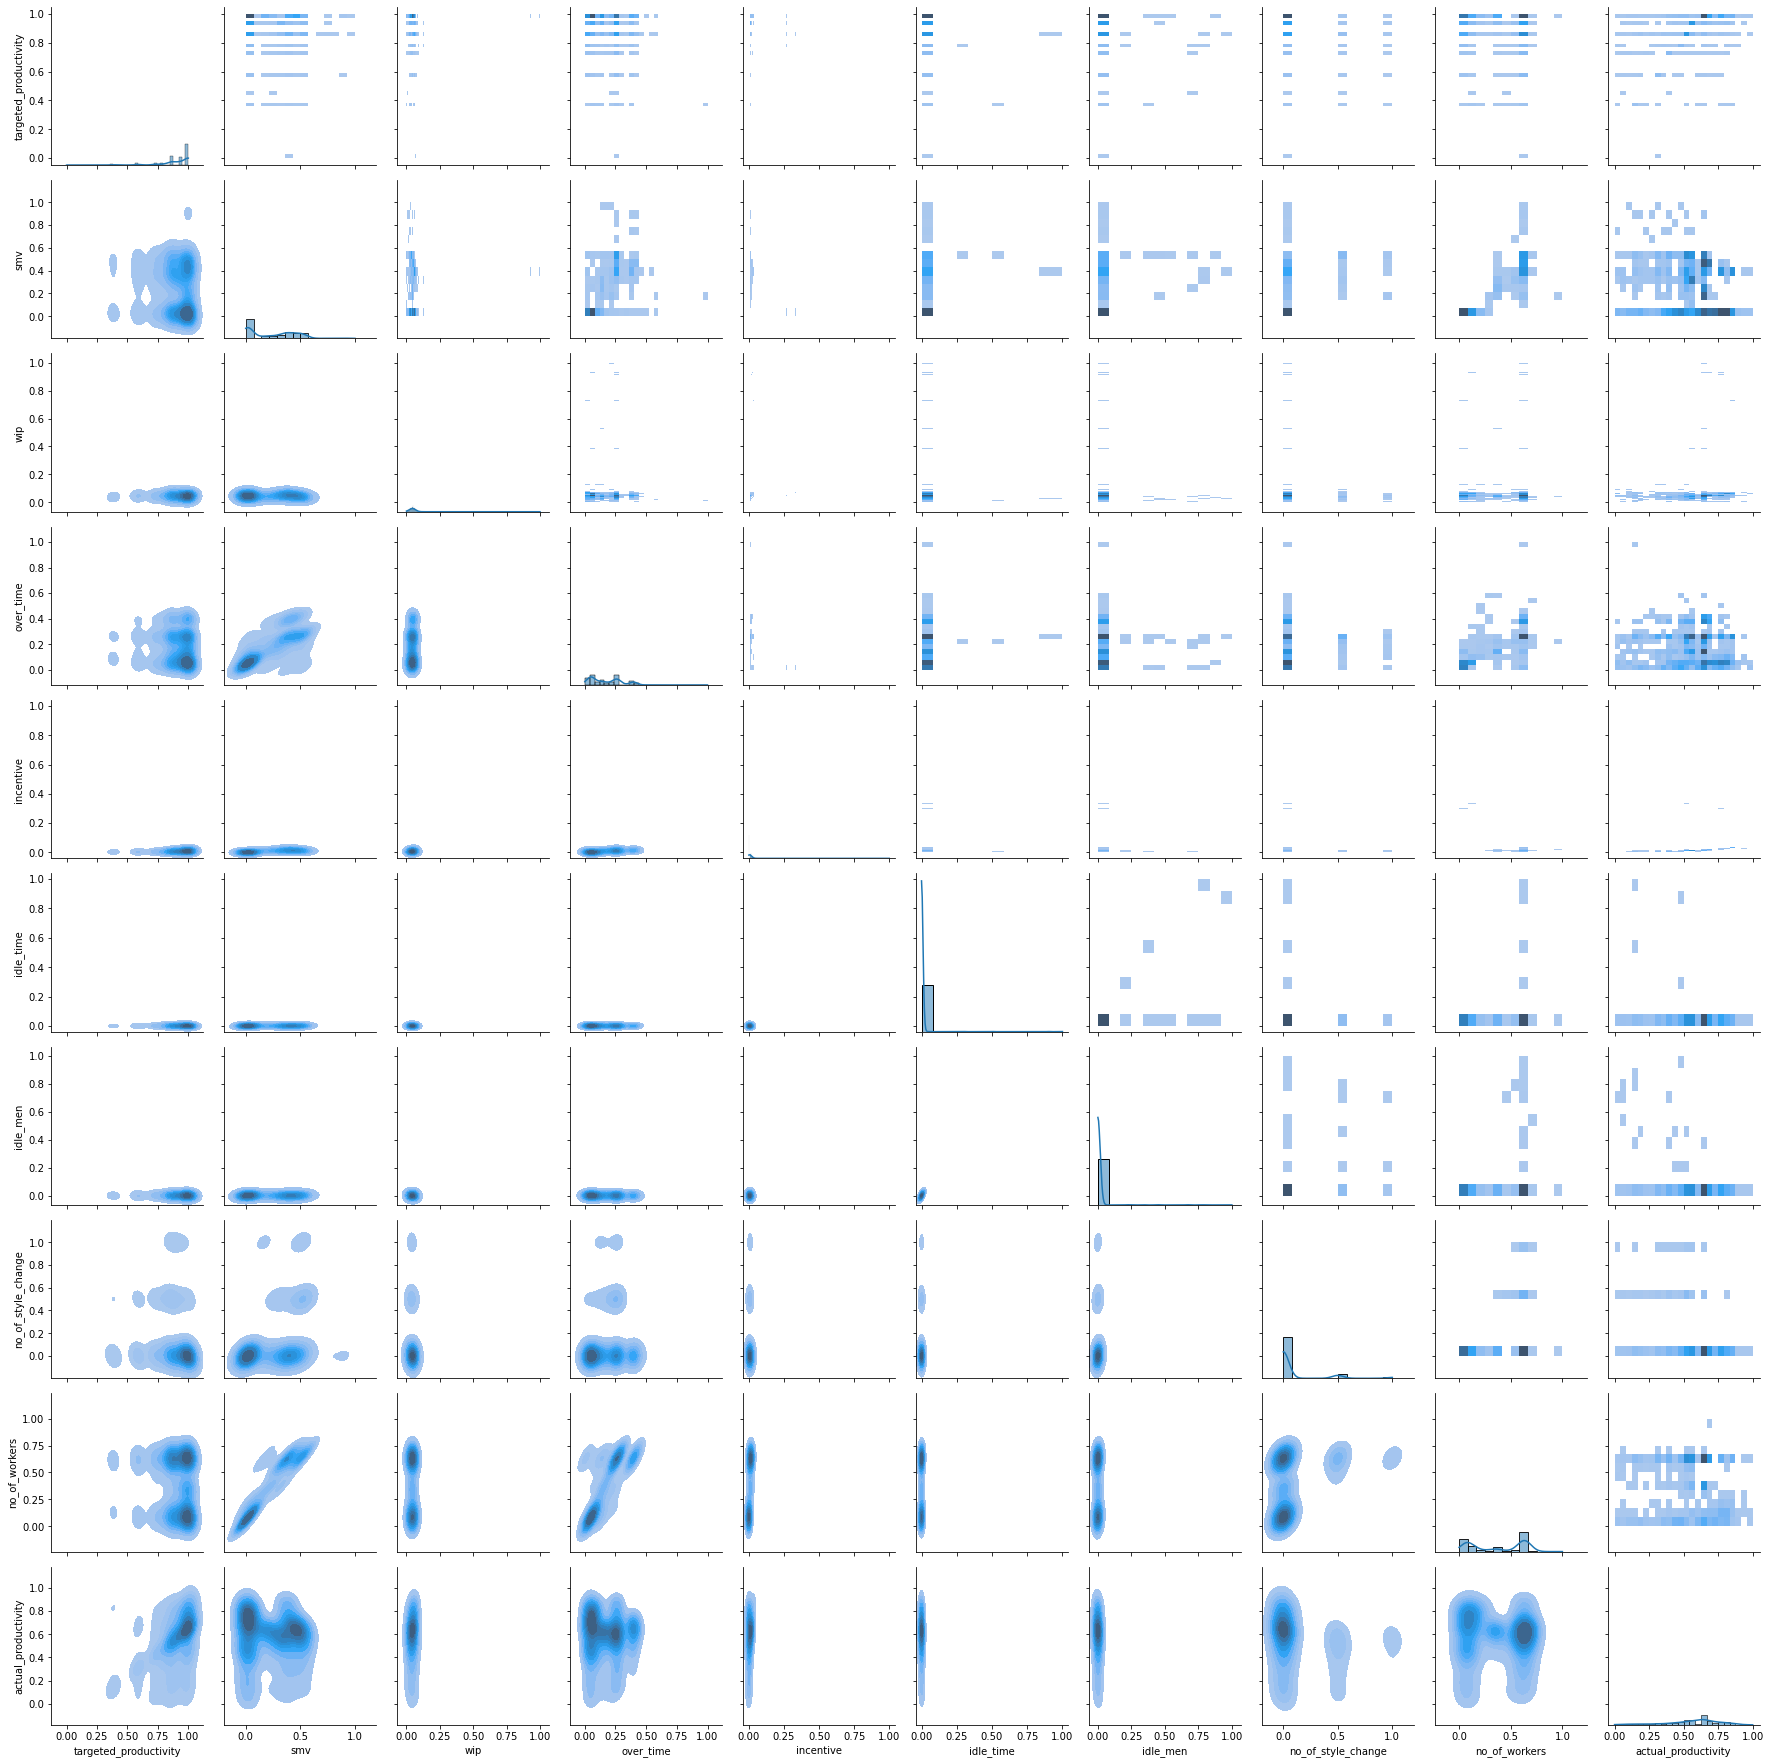

In [74]:
g = sns.PairGrid(garment)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

<AxesSubplot:xlabel='actual_productivity', ylabel='Count'>

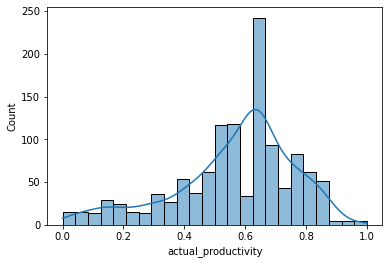

In [67]:
sns.histplot(garment, x="actual_productivity", kde=True)

In [70]:
garment.describe(include='all')

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197,1197,1197,1197,1197,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
unique,59,5,2,6,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,3/11/2015,Quarter1,sewing,Wednesday,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,360,691,208,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,0.903606,0.235427,0.050638,0.176214,0.010614,0.002434,0.008206,0.075188,0.374826,0.565431
std,NaN,NaN,NaN,NaN,NaN,0.134097,0.211832,0.074667,0.129198,0.044495,0.042366,0.072644,0.213924,0.255146,0.196776
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,0.863014,0.020132,0.032663,0.055556,0.000000,0.000000,0.000000,0.000000,0.080460,0.469817
50%,NaN,NaN,NaN,NaN,NaN,0.931507,0.239257,0.045295,0.152778,0.000000,0.000000,0.000000,0.000000,0.367816,0.608558
75%,NaN,NaN,NaN,NaN,NaN,1.000000,0.413473,0.054899,0.268519,0.013889,0.000000,0.000000,0.000000,0.632184,0.695303


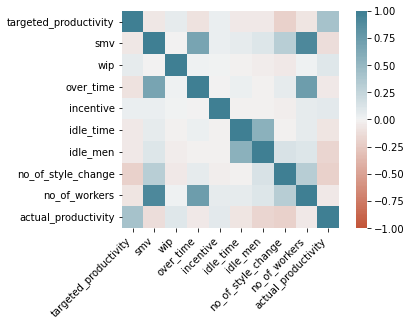

In [78]:

corr = garment.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);